In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [4]:
import pandas as pd
data = pd.read_csv("C://Users//Dell//Downloads//spam.csv")

In [5]:
data.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

# Here we observe some imbalance in data

In [6]:
data['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [7]:
747/4825

0.15481865284974095

It means 15% are spam emails and remaining percent is ham emails

I am going to apply the downsampling technique to handle the imbalanced data

In [8]:
df_spam = data[data.Category == 'spam']
df_spam

,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [9]:
df_ham = data[data.Category == 'ham']
df_ham

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
5565,ham,Huh y lei...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
df_ham.shape

(4825, 2)

In [11]:
df_spam.shape

(747, 2)

In [12]:
df_ham.shape[0]

4825

In [13]:
df_spam.shape[0]

747

In [14]:
df_spam.sample(2)

,Category,Message
368,spam,Here is your discount code RP176781. To stop f...
3425,spam,Am new 2 club & dont fink we met yet Will B gr...


Down sampling technique

In [15]:
df_ham_downsampled = df_ham.sample(df_spam.shape[0])

In [16]:
df_ham_downsampled.shape

(747, 2)

In [17]:
df_balanced = pd.concat([df_spam ,df_ham_downsampled])

In [18]:
df_balanced.shape

(1494, 2)

In [19]:
df_balanced.Category.value_counts()

ham     747
spam    747
Name: Category, dtype: int64

Now the data is in balanced format

In [20]:
df_balanced.head()

,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [21]:
df_balanced.sample(5)

,Category,Message
4337,ham,"Fyi I'm taking a quick shower, be at epsilon i..."
2745,ham,"Tick, tick, tick ... Babe"
3964,ham,If you ask her or she say any please message.
4447,ham,Merry christmas to u too annie!
1350,spam,FREE2DAY sexy St George's Day pic of Jordan!Tx...


In [22]:
df_balanced['Category'] = df_balanced['Category'].map({'spam':1,'ham':0})
#df_balanced['Category'] = df_balanced['Category'].map(lambda x: 1 if x=='spam' else 0)

In [23]:
df_balanced.sample(5)

,Category,Message
2732,0,Mm feeling sleepy. today itself i shall get th...
4631,0,Everybody had fun this evening. Miss you.
3483,1,Do you want a NEW video phone750 anytime any n...
4757,0,Don't make life too stressfull.. Always find t...
455,1,"Loan for any purpose £500 - £75,000. Homeowner..."


In [24]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df_balanced['Message'],df_balanced['Category'],stratify=df_balanced['Category'])

In [25]:
x_train.head(4)

4011    Wan2 win a Meet+Greet with Westlife 4 U or a m...
3895    Dear Dave this is your final notice to collect...
261                                                   Yup
1778    Buy Space Invaders 4 a chance 2 win orig Arcad...
Name: Message, dtype: object

In [26]:
x_test.head(4)

5460    December only! Had your mobile 11mths+? You ar...
1407    URGENT, IMPORTANT INFORMATION FOR O2 USER. TOD...
5237    Someonone you know is trying to contact you vi...
1934                              R u over scratching it?
Name: Message, dtype: object

In [27]:
y_train.head()

4011    1
3895    1
261     0
1778    1
763     1
Name: Category, dtype: int64

In [28]:
y_test.head(4)

5460    1
1407    1
5237    1
1934    0
Name: Category, dtype: int64

In [29]:
len(x_train)

1120

In [30]:
len(y_train)

1120

In [31]:
len(x_test)

374

In [32]:
len(y_test)

374

In [33]:
374/1120

0.3339285714285714

In [34]:
Encoded_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
preprocess_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

First we need to preprocess the text and then encode the preprocessed text

Bert     --->       'some text'    ---> 768 embedded vector

In [35]:
pre_process = hub.KerasLayer(preprocess_url)
bert_model = hub.KerasLayer(Encoded_url)

In [36]:
def get_embedded_vector(x_train):
    # pre-processing
    P_text = pre_process(x_train)
    # encoding
    dictionary = bert_model(P_text)
    
    return dictionary['pooled_output']
    
        
    

In [37]:
get_embedded_vector(x_train)

<tf.Tensor: shape=(1120, 768), dtype=float32, numpy=
array([[-0.7109802 , -0.43317965, -0.848329  , ..., -0.7070879 ,
        -0.58623236,  0.7799153 ],
       [-0.7203218 , -0.47705927, -0.7804279 , ..., -0.4173547 ,
        -0.679417  ,  0.7594791 ],
       [-0.90347314, -0.3457807 , -0.4567123 , ..., -0.20338017,
        -0.6832431 ,  0.9097603 ],
       ...,
       [-0.545925  , -0.3126666 , -0.5064012 , ..., -0.30316502,
        -0.5914583 ,  0.65929043],
       [-0.65632844, -0.34451997, -0.8506403 , ..., -0.83159083,
        -0.5651314 ,  0.85575175],
       [-0.8273523 , -0.38553822, -0.8411029 , ..., -0.70633626,
        -0.61436445,  0.87246966]], dtype=float32)>

In [38]:
e = get_embedded_vector([
       "Banana",
        "Mango",
        "Apple",
        "Grapes",
        "Pineapple"
])

In [39]:
e

<tf.Tensor: shape=(5, 768), dtype=float32, numpy=
array([[-0.7606916 , -0.14219356,  0.49604708, ...,  0.42165396,
        -0.5322139 ,  0.80312157],
       [-0.71288604, -0.15463917,  0.38401607, ...,  0.352787  ,
        -0.5099134 ,  0.73474085],
       [-0.8196457 , -0.29609615,  0.20951729, ...,  0.25593367,
        -0.58742994,  0.8434556 ],
       [-0.86023223, -0.21242955,  0.4915689 , ...,  0.39797997,
        -0.60506296,  0.84471667],
       [-0.9445645 , -0.29428923, -0.82253027, ..., -0.6587867 ,
        -0.7073774 ,  0.91884834]], dtype=float32)>

In [40]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([e[0]],[e[1]])

array([[0.9954097]], dtype=float32)

In [41]:
# Bert layers
text_input = tf.keras.layers.Input(shape = (), dtype=tf.string, name='text') # input layer
# name=' text' this is name of the layer
P_text = pre_process(text_input)
outputs = bert_model(P_text)
#outputs is 768 size vector

# Neural Network layers

l = tf.keras.layers.Dropout(0.1,name='dropout')(outputs['pooled_output'])

l = tf.keras.layers.Dense(1,activation='sigmoid',name='output')(l)

#construct final model

model = tf.keras.Model(inputs = [text_input],outputs = [l])


In [42]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [43]:
METRICS = [
    tf.keras.metrics.BinaryAccuracy(name='Accuracy'),
    tf.keras.metrics.Precision(name='Precision'),
    tf.keras.metrics.Recall(name='Recall')
]

model.compile(
     optimizer = 'adam',
     loss = 'binary_crossentropy',
     metrics = METRICS)

In [44]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
35/35 [==============================] - 271s 7s/step - loss: 0.6379 - Accuracy: 0.6375 - Precision: 0.6323 - Recall: 0.6571
Epoch 2/10
35/35 [==============================] - 239s 7s/step - loss: 0.5175 - Accuracy: 0.7929 - Precision: 0.8037 - Recall: 0.7750
Epoch 3/10
35/35 [==============================] - 239s 7s/step - loss: 0.4390 - Accuracy: 0.8518 - Precision: 0.8481 - Recall: 0.8571
Epoch 4/10
35/35 [==============================] - 239s 7s/step - loss: 0.3984 - Accuracy: 0.8616 - Precision: 0.8546 - Recall: 0.8714
Epoch 5/10
35/35 [==============================] - 227s 6s/step - loss: 0.3586 - Accuracy: 0.8795 - Precision: 0.8696 - Recall: 0.8929
Epoch 6/10
35/35 [==============================] - 236s 7s/step - loss: 0.3384 - Accuracy: 0.8893 - Precision: 0.8811 - Recall: 0.9000
Epoch 7/10
35/35 [==============================] - 247s 7s/step - loss: 0.3192 - Accuracy: 0.8955 - Precision: 0.8761 - Recall: 0.9214
Epoch 8/10
35/35 [==============================

In [45]:
model.evaluate(x_test,y_test)

12/12 [==============================] - 104s 8s/step - loss: 0.2885 - Accuracy: 0.9118 - Precision: 0.9185 - Recall: 0.9037


[0.2884715795516968, 0.9117646813392639, 0.91847825050354, 0.903743326663971]

In [46]:
y_predicted = model.predict(x_test)
y_predicted = y_predicted.flatten()

In [47]:
y_predicted

array([0.92076004, 0.66211796, 0.68437713, 0.01023215, 0.77785945,
       0.02920419, 0.04397649, 0.6869031 , 0.04261723, 0.77222943,
       0.9566282 , 0.34175187, 0.87344736, 0.541816  , 0.07161969,
       0.47500166, 0.07056588, 0.05891848, 0.56854093, 0.87031746,
       0.575277  , 0.19646642, 0.7292129 , 0.7975534 , 0.57211375,
       0.03738686, 0.02228552, 0.72583807, 0.14141968, 0.14306703,
       0.0710935 , 0.95174265, 0.15718156, 0.5811058 , 0.04513821,
       0.81294453, 0.7981801 , 0.04658931, 0.48530692, 0.04998398,
       0.40248647, 0.9436422 , 0.867436  , 0.88647944, 0.40285233,
       0.87462914, 0.31219018, 0.43682954, 0.70244956, 0.8481617 ,
       0.08849353, 0.21901566, 0.7154271 , 0.9431756 , 0.16300976,
       0.78525937, 0.80605865, 0.88161135, 0.07287446, 0.07173678,
       0.10115889, 0.0559102 , 0.04392582, 0.9130745 , 0.8777184 ,
       0.842273  , 0.24854147, 0.24777916, 0.55782264, 0.60870206,
       0.9261732 , 0.23053169, 0.01880482, 0.90829235, 0.77903

y_predicted is bunch of sigmoid values

In [48]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5 ,1 ,0) # if y_predicted value is > 0.5 put 1 otherwise put 0
y_predicted

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,

In [49]:
from sklearn.metrics import confusion_matrix , classification_report

cm = confusion_matrix(y_test,y_predicted)
cm

array([[172,  15],
       [ 18, 169]], dtype=int64)

Text(33.0, 0.5, 'Truth')

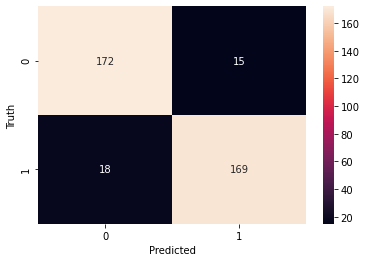

In [50]:
from matplotlib import pyplot as plt
import seaborn as sn

sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
print(classification_report(y_test,y_predicted))


              precision    recall  f1-score   support

           0       0.91      0.92      0.91       187
           1       0.92      0.90      0.91       187

    accuracy                           0.91       374
   macro avg       0.91      0.91      0.91       374
weighted avg       0.91      0.91      0.91       374



In [52]:
model.save("saved_model_1/")

INFO:tensorflow:Assets written to: saved_model_1/assets


INFO:tensorflow:Assets written to: saved_model_1/assets


In [53]:
model.save("saved_model_2/")

INFO:tensorflow:Assets written to: saved_model_2/assets


INFO:tensorflow:Assets written to: saved_model_2/assets


In [54]:
model.save("saved_model_3/")

INFO:tensorflow:Assets written to: saved_model_3/assets


INFO:tensorflow:Assets written to: saved_model_3/assets
